In [90]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.tools import eval_measures


In [91]:
# leemos el dataset limpio y eliminamos columnas que no vamos a usar
filename = "../dataset/capital.csv"
data = pd.read_csv(filename, sep=',')
data.drop([data.columns[0],"numero","description", "price_usd_per_m2", "price_aprox_local_currency","price_per_m2" ,"title", "property_type"], axis=1,inplace=True)
display(data.sample(n=2))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")


,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,piscina,Parrilla,Cochera,nuevo
16794,Belgrano,635000,157,143,2,4,100000,0,0,1,0
4523,San Telmo,706374,35,31,1,1,0,0,1,1,1


(Cantidad de Filas, Cantidad de columnas) -> (16938, 11)


In [92]:
data = data[(data.place_name=="Palermo")]
display(data.sample(n=2))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,piscina,Parrilla,Cochera,nuevo
3448,Palermo,185000,36,34,2,1,0,1,1,1,1
16553,Palermo,890000,252,235,3,3,0,0,0,1,0


(Cantidad de Filas, Cantidad de columnas) -> (1351, 11)


# Dataset

El dataset ya se encuentra limpio, y cuenta con 16938 Propiedades de Capital Federal.

**Campos**
<pre>
place_name:                Barrio
price_aprox_usd:           Precio en dolares. Variable Target
surface_total_in_m2:       Metros cuadrados totales de la propiedad
surface_covered_in_m2:     Metros cuadrados cubiertos de la propiedad
floor:                     Piso en que se encuentra la propiedad.
rooms:                     Habitaciones de la propiedad
expenses:                  Valor de las Expensas en pesos
piscina:                   Si tiene pisina (0: No tiene, 1: Tiene)
Parrilla:                  Si tiene parrilla (0: No tiene, 1: Tiene)
Cochera:                   Si tiene cochera (0: No tiene, 1: Tiene)
nuevo:                     Si es nuevo (0: no es nuevo, 1: es nuevo)
</pre>

`place_name` es una Variable categorica,hay que crear variables dummies.
`surface_total_in_m2`, `surface_covered_in_m2`, `floor`, `rooms` y `expenses` son variables continuas, y hay que estandarizarlas para llevarlas al intevalo 0-1.


Paso 2:
Estandarizamos los campos numéricos `surface_total_in_m2`, `surface_covered_in_m2`, `floor`, `rooms` y `expenses`.

In [93]:
numericals = ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses']

X = data[numericals]

scaler = MinMaxScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
X = std_df
X

,surface_total_in_m2_std,surface_covered_in_m2_std,floor_std,rooms_std,expenses_std
0,0.081437,0.023006,0.133333,0.066667,0.000000
1,0.273054,0.300613,0.133333,0.133333,0.000000
2,0.059880,0.042945,0.066667,0.066667,0.050000
3,0.261078,0.177914,0.066667,0.266667,0.000000
4,0.344910,0.453988,0.066667,0.066667,0.000000
...,...,...,...,...,...
1346,0.099401,0.124233,0.266667,0.200000,0.000000
1347,0.047904,0.073620,0.200000,0.133333,0.000000
1348,0.235928,0.292945,0.066667,0.200000,0.376316
1349,0.141317,0.193252,0.066667,0.066667,0.000000


Ahora nuestro dataset de features serán las variables dummies y las variables numéricas estandarizadas

La variable target es `price_aprox_usd`

In [94]:
y = data.price_aprox_usd

Paso 3:
Separamos el conjunto train y test.
* Spliteamos el dataframe el dataframe construido, con las variables dummies y estandarizadas.
* El tamaño del conjunto de datos lo definimos en 30% de los datos.
* fijamos la semilla de los nímeros aleatoaleatoriosrios.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 117)

Paso 4:
Ajustemos una regresión lineal múltiple con los datos del conjunto de entrenamiento usando statsmodels y evaluemos la significancia de cada uno de los coeficientes

In [96]:
X_train_sm = sm.add_constant(X_train)
y_train = list(y_train)

model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     81.32
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.12e-66
Time:                        04:58:49   Log-Likelihood:                -9674.5
No. Observations:                 675   AIC:                         1.936e+04
Df Residuals:                     669   BIC:                         1.939e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.907e+04    3.6e+04      1.363      0.173   -2.16e+04     1.2e+05
surface_total_in_m2_std   -2.012e+05   5.45e+05     -0.369      0.712   -1.27e+06    8.69e+05
surface_covered_in_m2_std  2.738e+06    5.1e+05      5.374      0.000    1.74e+06    3.74e+06
floor_std                   4.26e+04   1.02e+05      0.416      0.677   -1.58e+05    2.43e+05
rooms_std                  8682.6522   2.05e+05      0.042      0.966   -3.93e+05    4.11e+05
expenses_std              -1.977e+04   1.66e+05     -0.119      0.905   -3.46e+05    3.06e+05
==============================================================================
Omnibus:                      719.467   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38244.938
Skew:                           5.025   Prob(JB):                         0.00
Kurtosis:                      38.480   Cond. No.                         49.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se ven muchos campos un un p-value muy alto. por lo tanto no podemos rechazar la hipótesis nula que dice que los coeficientes de esas dos variables son 0.


In [97]:
no_reg_model_params = model.params

Para este modelo de regresion lineal multiple, calculamos el error cuadratico en train y test.

In [98]:
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

405825.8808745299
339846.23371995613


Vemos que pareciera no estar bien entrenado, ya que los resultados no son parecidos.

Por otra parte, vimos que el `R-squared` y el `R-squared ajustado` dieron muy bajos, por lo que creemos que usando regularizaciòn podrìamos arreglar este problema.
<pre>
R-squared:	0.175
Adj. R-squared:	0.170
</pre>

Paso 5:

Ajustamos el modelo aplicando regularización de Lasso y validación cruzada para estimar el mejor valor de $\alpha$ para este problema

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Definimos el rango de de búsqueda del hiperparametro explicitamente
# normalize = False, porque ya normalizamos.
# cv=5 -> Dividimos el entrenamiento en 5.
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 30, 40, 50, 100],\
                                        normalize=False, cv=5) 

model_cv = lm_lasso.fit(X_train, y_train)

model_cv.score(X_train, y_train)

0.3778909345324719

In [101]:
model_cv.coef_

array([     -0.        , 2552089.65034498,   39326.87640513,
             0.        ,   -4983.57015565])

In [102]:
model_cv.intercept_

52890.21000199427

In [103]:
model_cv.alpha_

100.0

Se planteron todos los valores de alfa posibles,
Como dividimos el entrenamiento en 5, se calcula el error cuadratico promedio de los 5 entrenamientos, y obtenemos el Alfa.
Ahora chequeamos que el resultado no sea uno de los valores extremos: En este caso, `0.1750431565177899` no es extremo, por lo que lo tomamos como válido y vamos a confiar en ese alfa

In [104]:
model_cv.score(X_train, y_train)

0.3778909345324719

Paso 6:

Ajustemos los datos de entrenamiento con una regresión con regularización de Lasso para el valor de $\alpha$ calculado en el punto anterior usando statsmodels.

Usemos scatterplots para mostrar 

* los valores de los coeficientes de la regresión lineal múltiple obtenidos en el Paso 3, y los valores de los coeficientes de la regresión lineal con regularización de Lasso para el modelo entrenado.

* los valores de los residuos en entrenamiento resultado del Paso 3, y los residuos en entrenamiento para el modelo con regularización.

In [105]:
best_alpha = model_cv.alpha_

#L1_wt : 0, the fit is ridge regression. 1, the fit is the lasso 

no_reg_model = sm.OLS(y_train, X_train_sm)

reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 1)

In [106]:
reg_model.params

const                        5.594316e+04
surface_total_in_m2_std      4.078195e+05
surface_covered_in_m2_std    2.187052e+06
floor_std                    4.045954e+04
rooms_std                    0.000000e+00
expenses_std                -4.036936e+03
dtype: float64

Acá vemos que lasso hizo cero, elimino la variable expensas, ya que cree que no es buena para el modelo.

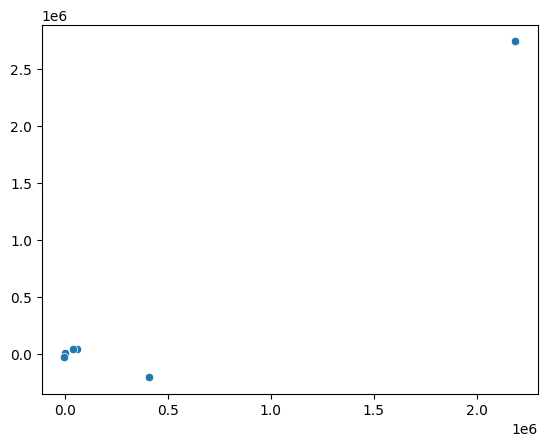

In [107]:
sns.scatterplot(x=reg_model.params, y=no_reg_model_params);

<AxesSubplot: >

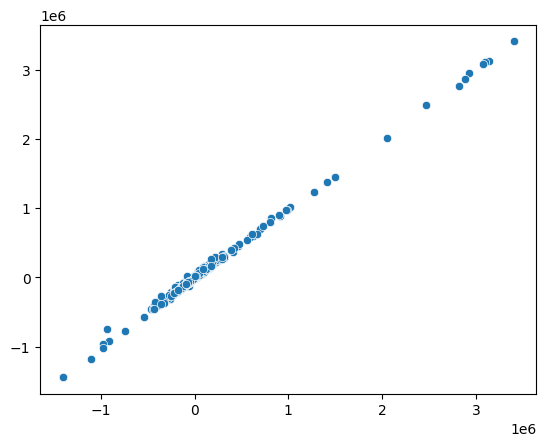

In [108]:
reg_residuals = y_train - reg_model.fittedvalues
linear_residuals = y_train - model.fittedvalues
sns.scatterplot(x = reg_residuals, y = linear_residuals)

Paso 7:

Usamos statsmodels y scikit-learn para calcular la performance en test del modelo construído y comparemos los resultados de las dos bibliotecas usando como métricas el error absoluto medio (MAE) y la raiz del error cuadrático medio (RMSE) 

In [109]:
sm_prediction = reg_model.predict(X_test_sm)
sm_prediction

1080    2.463865e+05
953     6.414069e+05
1256    1.747948e+05
303     1.427895e+06
672     3.737485e+05
            ...     
76      2.318209e+05
982     1.545459e+05
1265    5.845310e+05
859     2.492322e+05
23      2.333929e+05
Length: 676, dtype: float64

<AxesSubplot: xlabel='price_aprox_usd'>

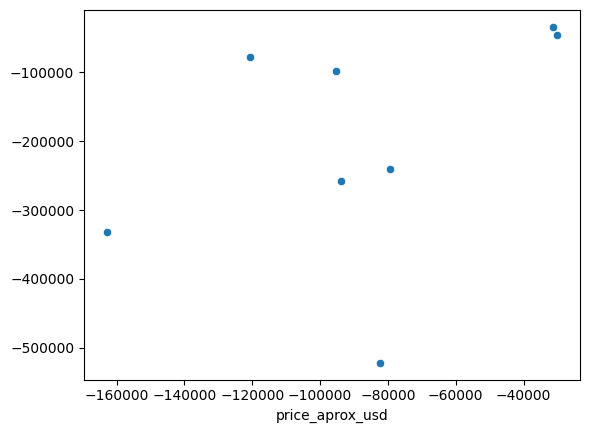

In [110]:
skl_lasso = linear_model.Lasso(alpha = best_alpha, fit_intercept=True, normalize=False)
skl_lasso = skl_lasso.fit(X= X_train, y = y_train)
skl_prediction = skl_lasso.predict(X_test)

skl_residuals = y_test - skl_prediction
sm_residuals = y_test - sm_prediction
sns.scatterplot(x = skl_residuals, y = sm_residuals)

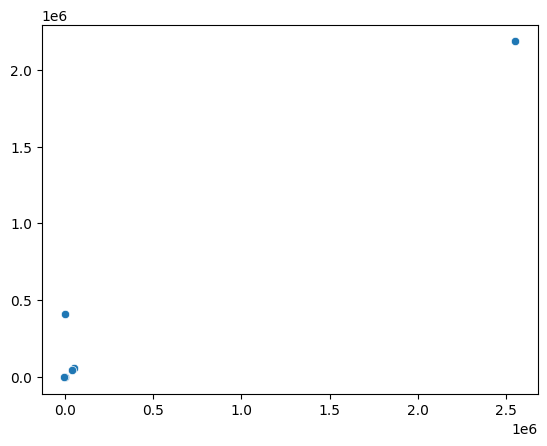

In [111]:
lasso_coef = np.insert(skl_lasso.coef_, 0, skl_lasso.intercept_)
sns.scatterplot(x = lasso_coef, y = reg_model.params);

In [112]:
lasso_coef

array([  52890.21000199,      -0.        , 2552089.65034498,
         39326.87640513,       0.        ,   -4983.57015565])

In [113]:
reg_model.params

const                        5.594316e+04
surface_total_in_m2_std      4.078195e+05
surface_covered_in_m2_std    2.187052e+06
floor_std                    4.045954e+04
rooms_std                    0.000000e+00
expenses_std                -4.036936e+03
dtype: float64

Métricas en `statsmodels`

In [114]:
eval_measures.rmse(y_test, sm_prediction)

340059.39444384293

In [115]:
eval_measures.meanabs(y_test, sm_prediction)

148462.68463332593

In [116]:
# de scikit-learn
metrics.r2_score(y_test, sm_prediction)

0.3845654955078701

Métricas en `scikit-learn`


In [117]:
np.sqrt(metrics.mean_squared_error(y_test, skl_prediction))

339797.9517183919

In [118]:
metrics.mean_absolute_error(y_test, skl_prediction)

148024.82210945056

In [119]:
metrics.r2_score(y_test, skl_prediction)

0.38551144215910294

In [144]:
o = data[:20][['place_name', 'price_aprox_usd']]
p = skl_lasso.predict(X_test[:20])
for idx in range(len(p)):
    print(f'Localidad: {o.place_name[idx]:<25}Precio dataset: {o.price_aprox_usd[idx]:<8}Precio predecido:{p[idx]:<25}Diferencia: {p[idx]-o.price_aprox_usd[idx]}')

array([ 232945.61478093,  642649.19125888,  175115.33303964,
       1374613.55416457,  376480.33202045,  185974.63962121,
        270795.63791107,  204132.92662288,  364737.58823052,
        183389.72728194,  185974.63962121,  742714.73185872,
        210789.46279178,  331892.62021775,  296902.91725127,
       1075838.25531669,  180767.9355216 ,  172939.43966165,
        227738.91068132,  114042.11549573])

In [130]:
o = data[['place_name', 'price_aprox_usd']]
p = skl_lasso.predict(X_test)
for idx in range(len(p)):
    if abs(p[idx] - o.price_aprox_usd[idx])<5000:
        print(f'Localidad: {o.place_name[idx]:<25}Precio dataset: {o.price_aprox_usd[idx]:<8}Precio predecido:{p[idx]:<25}Diferencia: {p[idx]-o.price_aprox_usd[idx]:.0f}')

KeyError: 0